# Crypto Asset Portfolio

In [54]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
start_date = '2019-11-01'
end_date = '2020-11-01'

crypto_df = yf.download('BTC-USD ETH-USD ADA-USD LTC-USD', 
                      start=start_date, 
                      end=end_date, 
            
                       auto_adjust=True)

[*********************100%***********************]  4 of 4 completed


In [152]:
crypto_df.head()

Close                                          High  \
             ADA-USD      BTC-USD     ETH-USD    LTC-USD   ADA-USD   
Date                                                                 
2019-10-31  0.041636  9199.584961  183.966919  58.780685  0.042792   
2019-11-01  0.042345  9261.104492  183.969894  58.583645  0.042858   
2019-11-02  0.042599  9324.717773  183.925720  58.597027  0.042745   
2019-11-03  0.041930  9235.354492  182.425018  58.625191  0.042684   
2019-11-04  0.043236  9412.612305  186.355194  61.573055  0.043257   

                                                     Low               \
                BTC-USD     ETH-USD    LTC-USD   ADA-USD      BTC-USD   
Date                                                                    
2019-10-31  9383.161133  188.751266  60.081844  0.040456  9028.717773   
2019-11-01  9275.657227  185.059708  58.751560  0.041240  9132.047852   
2019-11-02  9377.486328  185.708954  59.334785  0.042069  9249.587891   
2019-11-03  9379.806641  185.024216  58.966866  0.041358  9141.251953   
2019-11-04  9505.051758  188.022934  62.176826  0.041607  9191.485352   

                                       Open                           \
               ETH-USD    LTC-USD   ADA-USD      BTC-USD     ETH-USD   
Date                                                                   
2019-10-31  180.068359  57.692127  0.041963  9202.458008  184.797623   
2019-11-01  181.094498  57.719109  0.041645  9193.992188  183.803696   
2019-11-02  182.797668  58.219505  0.042336  9259.783203  184.018158   
2019-11-03  179.818146  57.641125  0.042581  9324.787109  183.994827   
2019-11-04  181.821609  58.383060  0.041889  9235.607422  182.319031   

                         Volume                                        
              LTC-USD   ADA-USD      BTC-USD      ETH-USD     LTC-USD  
Date                                                                   
2019-10-31  58.363445  65333067  26583653947   9607939606  3165801278  
2019-11-01  58.746315  60880837  24324691031   9145611130  3425154368  
2019-11-02  58.579086  47127524  21242676385   8087991830  3353942166  
2019-11-03  58.592102  38559537  21132220847   8760247744  3259935586  
2019-11-04  58.595737  62120503  26170255634  10551917945  4164854559

In [153]:
crypto_df = crypto_df.drop(columns=['Open', 'Volume', 'High', 'Low'])
crypto_df.columns = crypto_df.columns.droplevel()

In [154]:
crypto_df.head()

,ADA-USD,BTC-USD,ETH-USD,LTC-USD
Date,,,,
2019-10-31,0.041636,9199.584961,183.966919,58.780685
2019-11-01,0.042345,9261.104492,183.969894,58.583645
2019-11-02,0.042599,9324.717773,183.925720,58.597027
2019-11-03,0.041930,9235.354492,182.425018,58.625191
2019-11-04,0.043236,9412.612305,186.355194,61.573055


In [155]:
crypto_df.index = pd.to_datetime(crypto_df.index)

In [156]:
start_date

'2019-11-01'

In [157]:
reset_start = datetime.strptime(start_date, '%Y-%m-%d')
reset_end = datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=1)

In [158]:
#Caluclate if 25% lump sum investment, what the return would be


crypto_lump_prices = pd.DataFrame(crypto_df.loc[reset_start, :])
end_prices = crypto_df.loc[reset_end, :].values
crypto_lump_prices[reset_end] = end_prices
crypto_lump_prices.columns = pd.to_datetime(crypto_lump_prices.columns)


#calculate holdings based on starting_investment
#create dataframe on holdings


In [159]:
crypto_lump_prices

,2019-11-01,2020-10-31
ADA-USD,0.042345,0.093056
BTC-USD,9261.104492,13780.995117
ETH-USD,183.969894,386.590332
LTC-USD,58.583645,55.590260


In [160]:
#create holdings dataframe * 250
start_holdings = 300 / crypto_lump_prices[reset_start]
end_value = start_holdings * crypto_lump_prices[reset_end]


holdings_df= pd.DataFrame(index=crypto_lump_prices.index)
holdings_df['Crypto Holdings'] = start_holdings

value_df= pd.DataFrame(index=crypto_lump_prices.index)
value_df['Start Value'] = [300,300,300,300]
value_df['End Value'] = end_value
value_df['P/L'] = end_value
value_df['P/L %'] =(((value_df['End Value']-value_df['Start Value'])/value_df['Start Value'])*100).round(2)

In [161]:
value_df['P/L'].sum()

2020.7702795543064

In [172]:
# Dollar cost averageing
# 100 dollars per month on the start of each month
# 25 dollars in each crypto, no rebalancing

dca_start_monthly = 100

date1 = start_date  # input start date
date2 = end_date  # input end date

month_list = [i.strftime("%Y-%m-%d") for i in pd.date_range(start=reset_start, end=reset_end, freq='MS')]


dca_prices_df = crypto_df.loc[month_list, :]

dca_purchases_df = 25 / dca_prices_df 

#subset_prices = crypto_df['2020-01-01']

#dca_holdings = ((dca_start_monthly/4) / crypto_lump['2020-01-01'])

month_list

['2019-11-01',
 '2019-12-01',
 '2020-01-01',
 '2020-02-01',
 '2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01',
 '2020-10-01']

In [163]:
total_dca_holdings = dca_purchases_df.sum()

In [164]:
dca_end_value = total_dca_holdings * dca_prices_df.tail(1)

In [165]:
dca_end_value

,ADA-USD,BTC-USD,ETH-USD,LTC-USD
Date,,,,
2020-10-01,533.87375,355.456779,509.060935,275.505574


In [166]:
total_dca_holdings

ADA-USD    5454.481508
BTC-USD       0.033460
ETH-USD       1.441155
LTC-USD       5.952611
dtype: float64

In [167]:
dca_prices_df.tail(1)

,ADA-USD,BTC-USD,ETH-USD,LTC-USD
Date,,,,
2020-10-01,0.097878,10623.330078,353.231293,46.283146


In [168]:
dca_end_value.sum(axis=1)

Date
2020-10-01    1673.897038
dtype: float64

In [169]:
dca_total_inv = 1200
ending_pl = (dca_end_value.sum(axis=1)-1200) / 1200

In [170]:
ending_pl

Date
2020-10-01    0.394914
dtype: float64

<AxesSubplot:xlabel='Date'>

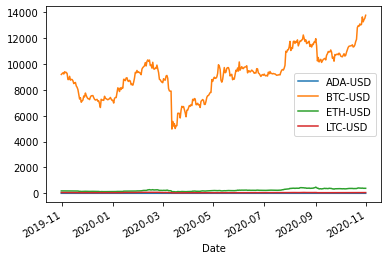

In [171]:
crypto_df.plot()

# DCA Analysis

Scenarios:
1. DCA BTC
    * Every 14 days buy all in BTC<br>
2. DCA ETH
    * Every 14 days buy all in ETH<br>
3. DCA BTC & ETH
    * Buy BTC and ETH every 14 days at market price (50/50 split)<br>
4. DCA BTC & ETH (Re-balance every month)
    * Buy BTC and ETH every 14 days but re-balance so full portfolio is 50/50 split on first of month<br>
5. DCA Top 4 (BTC, ETH, ADA, LTC)
    * Buy top 4 crypto at market price every 14 days (25% splits)<br>
6. DCA Top 4 (BTC, ETH, ADA, LTC)
    * Buy top 4 crypto every 14 days but re-balance full portfolio every 1st of month<br>

## Setup main price list